In [2]:
# Cooperativa Morteros 
# Análisis de Consumo de Agua
# Cooperativa Morteros
# Diego Vaira
# Miguel Squillari

# cooperativa Morteros provee de agua a toda la ciudad, donde ingresa desde el canal de Villa Maria.
# la problematica actual es que la cisterna que bombea agua a la ciudad suele quedarse sin, debido 
# al consumo de los habitantes. 

In [20]:
# imports
import pandas as pd
import numpy as np
import seaborn as sbn
import datetime
import matplotlib as plot
import matplotlib.pyplot as plt
from IPython.display import display

In [110]:
# Data import 

train_df = pd.read_csv("resources/Historico agua potable2021_30032022.csv", delimiter=";")
train_consumo = pd.read_csv("resources/Historial de Consumos Agua.csv", delimiter="," , thousands=".")
# train_test = pd.read_csv("resources/Historial_Agua.csv")

In [109]:
""""
Tenemos dos datasets:
1- Referido a la ciudad de Morteros, en el cual se encuentra la cisterna que produce agua potable.
    1.1 Conocer los periodos de mas consumo para la cisterna.
    1.2 Buscar correlación entre las variables de consumo, como periodo de tiempo, temperatura, humedad y la cisterna.
2- El dataset de consumo de agua, donde se encuentra el historial de consumos de agua de la ciudad.
    2.1 Conocer las cuentas que mas consumen
    2.2 En que periodos consumen mas agua.
"""

1.633
1633.0


In [111]:
display(train_consumo.head(5))

display("Cantidad total", train_consumo['Cuenta'].count())

display("Cantidad total unicas cuentas:",train_consumo['Cuenta'].nunique())

display(("Consumo maximo:",  train_consumo['Consumo'].max()))


train_consumo.sort_values("Consumo", inplace = True,ascending=False)

display(train_consumo.head(2))

display("cuenta con consumo maximo:",train_consumo.where(train_consumo['Cuenta']== 46816).dropna())



train_consumo['Periodo'] = train_consumo['Periodo'].astype("string")
# which will by default set the length to the max len it encounters
#df = train_consumo.groupby(['Periodo']).count()



,Periodo,Fecha,Cuenta,Consumo
0,ene-20,03/01/2020,38195,1
1,ene-20,03/01/2020,45324,2
2,ene-20,03/01/2020,2620,3
3,ene-20,03/01/2020,47087,3
4,ene-20,03/01/2020,39755,3


'Cantidad total'

176204

'Cantidad total unicas cuentas:'

7681

('Consumo maximo:', 1613)

,Periodo,Fecha,Cuenta,Consumo
120476,jul-21,19/07/2021,46816,1613
112257,jun-21,17/06/2021,46816,1579


'cuenta con consumo maximo:'

,Periodo,Fecha,Cuenta,Consumo
120476,jul-21,19/07/2021,46816.0,1613.0
112257,jun-21,17/06/2021,46816.0,1579.0
35836,jun-20,17/06/2020,46816.0,1506.0
125241,ago-21,17/08/2021,46816.0,1473.0
43938,jul-20,20/07/2020,46816.0,1457.0
55270,sep-20,18/09/2020,46816.0,1447.0
87884,feb-21,18/02/2021,46816.0,1437.0
63153,oct-20,20/10/2020,46816.0,1433.0
30788,may-20,20/05/2020,46816.0,1424.0
101452,abr-21,20/04/2021,46816.0,1390.0


,cantidad
Cuenta,
35105,6115.000
9486,6032.000
33041,5643.000
25305,5614.000
24505,5214.000
24953,5052.000
46816,4790.499
15325,3859.000
24755,3373.000


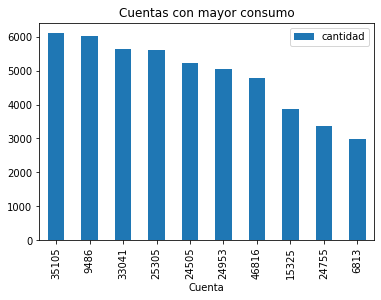

In [94]:
d = train_consumo.groupby(by=['Cuenta']).Consumo.agg(cantidad=('sum')).sort_values(by='cantidad', ascending=False).head(10)
#d = train_consumo.groupby(by=['Cuenta']).Consumo.agg(['sum', 'count']).sort_values(by='sum', ascending=False).head(10)
d.plot(kind="bar", title="Cuentas con mayor consumo")
display(d)

In [127]:
pd.to_datetime(train_consumo.Fecha, format="%d/%m/%y")
#train_consumo["Fecha"] = train_consumo["Fecha"].astype("datetime64[ns]")
train_consumo.dtypes


Periodo            string
Fecha      datetime64[ns]
Cuenta              int64
Consumo             int64
dtype: object

c:\Users\migue\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\arraylike.py:48: UserWarning: Parsing '31/12/2021' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  return self._cmp_method(other, operator.lt)


<AxesSubplot:title={'center':'Periodos con mayor consumo'}, xlabel='Periodo'>

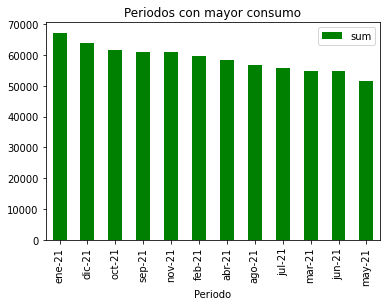

In [134]:
train_consumo.where((train_consumo.Fecha > '01/01/2021') & (train_consumo.Fecha < '31/12/2021')).groupby(by=['Periodo']).Consumo.agg(['sum']).sort_values(by='sum', ascending=False).head(12).plot(kind="bar", title="Periodos con mayor consumo", color="green")

In [158]:
# creo la columna periodo2 con mes y año
train_consumo['Periodo2'] = train_consumo['Fecha']
train_consumo['Periodo2'] = train_consumo['Periodo2'].astype("string")
train_consumo['Periodo2'] = train_consumo['Periodo2'].replace(to_replace=("-"), value="", regex=True)
train_consumo['Periodo2'] = train_consumo['Periodo2'].str.slice(start=0, stop=6)
display(train_consumo.head(5))




,Periodo,Fecha,Cuenta,Consumo,Periodo2
120476,jul-21,2021-07-19,46816,1613,202107
112257,jun-21,2021-06-17,46816,1579,202106
35836,jun-20,2020-06-17,46816,1506,202006
125241,ago-21,2021-08-17,46816,1473,202108
43938,jul-20,2020-07-20,46816,1457,202007


In [147]:
train_consumo.dtypes

Periodo             string
Fecha       datetime64[ns]
Cuenta               int64
Consumo              int64
Periodo2    datetime64[ns]
dtype: object

<AxesSubplot:title={'center':'Periodos con mayor consumo'}, xlabel='Periodo 2021'>

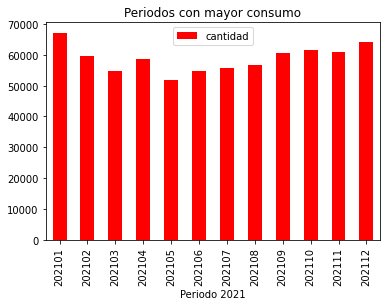

In [166]:
# Analizamos el 2021 ya que tenemos el año completo.

train_consumo.sort_values("Fecha")
train_consumo.where((train_consumo.Fecha > '01/01/2021') & (train_consumo.Fecha < '31/12/2021')).groupby(by=['Periodo2'])\
    .Consumo.agg( cantidad=('sum'))\
        .head(12)\
            .plot(kind="bar", title="Periodos con mayor consumo", color="red", xlabel='Periodo 2021')

c:\Users\migue\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\arraylike.py:48: UserWarning: Parsing '31/12/2021' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  return self._cmp_method(other, operator.lt)


,cantidad,media,promedio
Periodo2,,,
202101,67219.0,8.0,10.273422
202102,59715.0,7.0,9.119578
202103,54664.0,7.0,8.349473
202104,58569.0,7.0,8.914612
202105,51709.0,6.0,7.871670
202106,54745.0,6.0,8.335110
202107,55738.0,7.0,8.492762
202108,56559.0,7.0,8.627059
202109,60673.0,7.0,9.265883


c:\Users\migue\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\arraylike.py:48: UserWarning: Parsing '31/12/2021' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  return self._cmp_method(other, operator.lt)


<AxesSubplot:title={'center':'Periodos con mayor consumo'}, xlabel='Periodo 2021'>

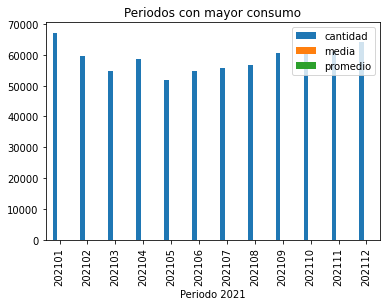

In [180]:
train_consumo.sort_values("Fecha")
display(train_consumo.where((train_consumo.Fecha > '01/01/2021') & (train_consumo.Fecha < '31/12/2021')).groupby(by=['Periodo2'])\
    .Consumo.agg( cantidad=('sum'), media=('median'), promedio=('mean'))\
        .head(12))

train_consumo.sort_values("Fecha")
train_consumo.where((train_consumo.Fecha > '01/01/2021') & (train_consumo.Fecha < '31/12/2021')).groupby(by=['Periodo2'])\
    .Consumo.agg( cantidad=('sum'), media=('median'), promedio=('mean'))\
        .head(12)\
            .plot(kind="bar", title="Periodos con mayor consumo",  xlabel='Periodo 2021')

In [176]:
# Para analizar por separado los meses.
#train_consumo['periodo_mes'] = train_consumo['Fecha'].dt.month
train_consumo.head(10)
train_consumo[['Consumo','periodo_mes','Cuenta']].corr("pearson")

,Consumo,periodo_mes,Cuenta
Consumo,1.000000,0.001304,-0.005077
periodo_mes,0.001304,1.000000,0.010242
Cuenta,-0.005077,0.010242,1.000000


In [200]:
# vamos a categorizar los clientes de acuerdo a su consumo.
# observamos la tanto la media como el promedio mensual es entre 8 y 10 vamos poner como categoria principal a Clientes con consumo bajo los que
# van desde 11 a 100 consumo medio y los que consumen 101 en adelante los considaremos como industria.
d = train_consumo.where(train_consumo.Consumo > 100 ).dropna()
dd = d['Cuenta']
dd.size

## creando ConsumoGroup
bins= [0,10,100,2000 ]
labels = ['residencial','comercio','industria']
train_consumo['ConsumoGroup'] = pd.cut(train_consumo['Consumo'], bins=bins, labels=labels, right=False)

labels = ['1','2','3']
train_consumo['ConsumoCategoria'] = pd.cut(train_consumo['Consumo'], bins=bins, labels=labels, right=False)
train_consumo.head(10)


,Periodo,Fecha,Cuenta,Consumo,Periodo2,periodo_mes,ConsumoGroup,ConsumoCategoria
120476,jul-21,2021-07-19,46816,1613,202107,7,industria,3
112257,jun-21,2021-06-17,46816,1579,202106,6,industria,3
35836,jun-20,2020-06-17,46816,1506,202006,6,industria,3
125241,ago-21,2021-08-17,46816,1473,202108,8,industria,3
43938,jul-20,2020-07-20,46816,1457,202007,7,industria,3
55270,sep-20,2020-09-18,46816,1447,202009,9,industria,3
87884,feb-21,2021-02-18,46816,1437,202102,2,industria,3
63153,oct-20,2020-10-20,46816,1433,202010,10,industria,3
30788,may-20,2020-05-20,46816,1424,202005,5,industria,3
101452,abr-21,2021-04-20,46816,1390,202104,4,industria,3


c:\Users\migue\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\arraylike.py:48: UserWarning: Parsing '31/12/2021' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  return self._cmp_method(other, operator.lt)


<AxesSubplot:title={'center':'Consumo por grupo'}, xlabel='ConsumoGroup'>

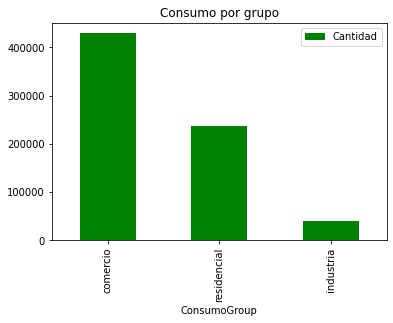

In [209]:
train_consumo.where((train_consumo.Fecha > '01/01/2021') & (train_consumo.Fecha < '31/12/2021'))\
.groupby(by=['ConsumoGroup']).Consumo.agg(Cantidad=('sum'))\
    .sort_values(by='Cantidad', ascending=False)\
        .plot(kind="bar", title="Consumo por grupo", color="green")

In [264]:
# Representación grafica de consumo, de acuerdo cada categoria.


vals = train_consumo.where((train_consumo.Fecha > '01/01/2021') & (train_consumo.Fecha < '31/12/2021'))\
.groupby(by=['ConsumoGroup']).Consumo.agg(Cantidad=('sum')).sort_values(by='Cantidad', ascending=False)

display("cuak", vals)

display("ConsumoGroup::")


"""
comercio = vals.Cantidad[0]
residencial =  vals.Cantidad[1]
Industria =  vals.Cantidad[2]

width = 0.55       
pip install virtualenv
fig, ax = plt.subplots()

ax.bar(labels, vals.Cantidad, width, label='Consumos')

ax.set_ylabel('Cantidad de m3 de consumo')
ax.set_title('Consumo por Categoria')
ax.legend()

plt.show()"""

c:\Users\migue\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\arraylike.py:48: UserWarning: Parsing '31/12/2021' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  return self._cmp_method(other, operator.lt)


'cuak'

,Cantidad
ConsumoGroup,
comercio,429127.0
residencial,236518.0
industria,40233.0


'ConsumoGroup::'

"\ncomercio = vals.Cantidad[0]\nresidencial =  vals.Cantidad[1]\nIndustria =  vals.Cantidad[2]\n\nwidth = 0.55       \n\nfig, ax = plt.subplots()\n\nax.bar(labels, vals.Cantidad, width, label='Consumos')\n\nax.set_ylabel('Cantidad de m3 de consumo')\nax.set_title('Consumo por Categoria')\nax.legend()\n\nplt.show()"

c:\Users\migue\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\arraylike.py:48: UserWarning: Parsing '31/12/2021' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  return self._cmp_method(other, operator.lt)


<AxesSubplot:xlabel='Periodo2'>

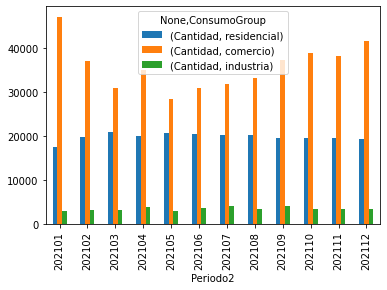

In [276]:
consumo_categ = train_consumo.where((train_consumo.Fecha > '01/01/2021') & (train_consumo.Fecha < '31/12/2021'))\
.groupby(by=['ConsumoGroup', 'Periodo2']).Consumo.agg(Cantidad=('sum'))\
    .sort_values(by='Cantidad', ascending=False).unstack('ConsumoGroup')

consumo_categ.plot.bar()  


In [277]:
display(consumo_categ)

Cantidad                   
ConsumoGroup residencial comercio industria
Periodo2                                   
202101           17365.0  47061.0    2793.0
202102           19713.0  36894.0    3108.0
202103           20798.0  30811.0    3055.0
202104           19927.0  34938.0    3704.0
202105           20700.0  28241.0    2768.0
202106           20284.0  30880.0    3581.0
202107           20147.0  31665.0    3926.0
202108           20060.0  33152.0    3347.0
202109           19409.0  37220.0    4044.0
202110           19422.0  38788.0    3228.0
202111           19511.0  38020.0    3272.0
202112           19182.0  41457.0    3407.0

Conclusiones sobre el analisis de consumo


In [8]:
# **********************************************************************************
# *************** COMIENZA EL ANALISIS DEL DATASET DE CONSUMO DE AGUA **************

train_df['Nivel_Cisterna'].isnull().values.any()
print(train_df.shape)
# print(train_df.loc[[112]])

(454, 8)


In [9]:
#train_df.apply(pd.to_numeric, errors='ignore') aplica a todas las columnas, pero si da error, chauu
# Cambiando los tipos de datos en las columns Nivel_Cisterna objet to float



'\nfor index, c in enumerate(train_df[\'Nivel_Cisterna\']):\n    val = val + c\n    c = val\n    val= ""\n    c = c.replace(",", ".")     \n    c = float(c)    \n    train_df.loc[[index]] = c\n\n\ntrain_df[\'Nivel_Cisterna\'] = train_df[\'Nivel_Cisterna\'].astype(float)\nprint("what ", train_df[\'Nivel_Cisterna\'])\n '

In [10]:

train_df['Nivel_Cisterna'] = train_df['Nivel_Cisterna'].astype(str)
train_df['Nivel_Cisterna'] = train_df['Nivel_Cisterna'].str.replace(',','.')
train_df['Nivel_Cisterna'] = train_df['Nivel_Cisterna'].astype(float)


train_df['Prom_Ingreso_Hora'] = train_df['Prom_Ingreso_Hora'].astype(str)
train_df['Prom_Ingreso_Hora'] = train_df['Prom_Ingreso_Hora'].str.replace(',','.')
train_df['Prom_Ingreso_Hora'] = train_df['Prom_Ingreso_Hora'].astype(float)

print(train_df['Prom_Ingreso_Hora'])

train_df['Prom_Egreso_Hora'] = train_df['Prom_Egreso_Hora'].astype(str)
train_df['Prom_Egreso_Hora'] = train_df['Prom_Egreso_Hora'].str.replace(',','.')
train_df['Prom_Egreso_Hora'] = train_df['Prom_Egreso_Hora'].astype(float)

train_df['Humedad'] = train_df['Humedad'].astype(str)
train_df['Humedad'] = train_df['Humedad'].str.replace(',','.')
train_df['Humedad'] = train_df['Humedad'].astype(float)

train_df['Temperatura'] = train_df['Temperatura'].astype(str)
train_df['Temperatura'] = train_df['Temperatura'].str.replace(',','.')
train_df['Temperatura'] = train_df['Temperatura'].astype(float)


# cambiando la fecha ... primero convierto a string, despues a dd/M/yy a Y/m/d y y por ultimo a Date .....
train_df['Fecha'] = train_df['Fecha'].astype(str)
train_df['Fecha'] = pd.to_datetime(train_df['Fecha'], format="%d/%m/%Y")
#train_df['Fecha'] = train_df['Fecha'].dt.strftime('%d/%m/%Y')



0      3303.0
1      3039.0
2      3133.0
3      3221.0
4      3309.0
        ...  
449    3403.0
450    3227.0
451    3222.0
452    3198.0
453    3272.0
Name: Prom_Ingreso_Hora, Length: 454, dtype: float64


In [11]:
# buscando correlacion entre las variables
print(train_df.dtypes)

print("")


Fecha                datetime64[ns]
Ingreso_m3/h                 object
Egreso_m3/h                  object
Prom_Ingreso_Hora           float64
Prom_Egreso_Hora            float64
Humedad                     float64
Temperatura                 float64
Nivel_Cisterna              float64
dtype: object



In [12]:
print("Correlacion de Nivel de Cisterna")
corr = train_df.corr()
corr[['Nivel_Cisterna']].sort_values(by = 'Nivel_Cisterna',ascending = False).style.background_gradient()

Correlacion de Nivel de Cisterna


,Nivel_Cisterna
Nivel_Cisterna,1.000000
Humedad,0.391426
Temperatura,-0.124657
Prom_Ingreso_Hora,-0.205151
Prom_Egreso_Hora,-0.222337


In [13]:
corr

,Prom_Ingreso_Hora,Prom_Egreso_Hora,Humedad,Temperatura,Nivel_Cisterna
Prom_Ingreso_Hora,1.000000,0.308524,-0.220344,0.104002,-0.205151
Prom_Egreso_Hora,0.308524,1.000000,-0.313302,0.130745,-0.222337
Humedad,-0.220344,-0.313302,1.000000,-0.405984,0.391426
Temperatura,0.104002,0.130745,-0.405984,1.000000,-0.124657
Nivel_Cisterna,-0.205151,-0.222337,0.391426,-0.124657,1.000000


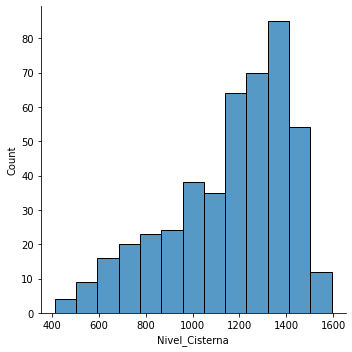

In [14]:
sbn.displot(train_df['Nivel_Cisterna']);

In [15]:
#sbn.displot(train_df['Prom_Egreso_Hora']);

print(train_df['Prom_Egreso_Hora'].max())
print("humedad max", train_df['Humedad'].max())
print("humedad min", train_df['Humedad'].min())
id_max = train_df['Temperatura'].idxmax()
print("Temperatura max", train_df['Temperatura'].max())
print("--> ", train_df.get(train_df.index == id_max))
print("Temperatura min", train_df['Temperatura'].min())

4131.0
humedad max 99.9
humedad min 14.8
Temperatura max 39.8
-->           Fecha Ingreso_m3/h Egreso_m3/h  Prom_Ingreso_Hora  Prom_Egreso_Hora  \
377 2022-01-13       137,27      130,28             3292.0            3116.0   

     Humedad  Temperatura  Nivel_Cisterna  
377     14.8         39.8          541.28  
Temperatura min 8.8


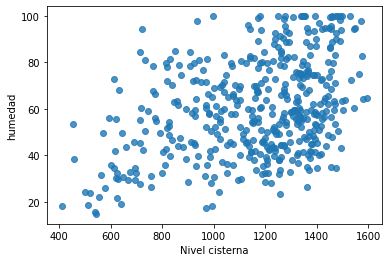

In [16]:
fig, ax = plt.subplots(1, 1, figsize=(6,4))
ax.scatter(x=train_df.Nivel_Cisterna, y=train_df.Humedad, alpha= 0.8)
ax.set_xlabel('Nivel cisterna')
ax.set_ylabel('humedad');

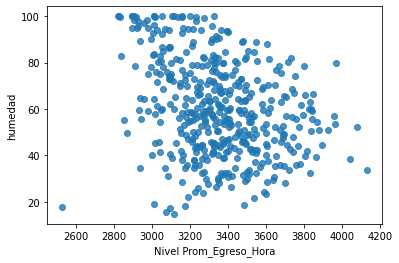

In [17]:
fig, ax = plt.subplots(1, 1, figsize=(6,4))
ax.scatter(x=train_df.Prom_Egreso_Hora, y=train_df.Humedad, alpha= 0.8)
ax.set_xlabel('Nivel Prom_Egreso_Hora')
ax.set_ylabel('humedad');

In [18]:
train_df['periodo_y'] = pd.DatetimeIndex(train_df['Fecha']).year.astype(str)
train_df['periodo_m'] = pd.DatetimeIndex(train_df['Fecha']).month.astype(str)
train_df['periodo'] = train_df.periodo_y.str.cat('/'+train_df.periodo_m)

train_df.head(225)


,Fecha,Ingreso_m3/h,Egreso_m3/h,Prom_Ingreso_Hora,Prom_Egreso_Hora,Humedad,Temperatura,Nivel_Cisterna,periodo_y,periodo_m,periodo
0,2021-01-01,"137,64","127,94",3303.0,3068.0,34.8,29.6,1456.18,2021,1,2021/1
1,2021-01-02,"126,64","155,17",3039.0,3725.0,33.6,31.7,1369.90,2021,1,2021/1
2,2021-01-03,"130,55","125,14",3133.0,3004.0,40.3,29.4,1408.93,2021,1,2021/1
3,2021-01-04,"134,23","141,42",3221.0,3391.0,41.4,31.9,1392.13,2021,1,2021/1
4,2021-01-05,"137,88","134,14",3309.0,3219.0,50.1,29.8,1370.95,2021,1,2021/1
...,...,...,...,...,...,...,...,...,...,...,...
220,2021-08-09,"131,53","118,56",3145.0,2837.0,82.8,11.0,1575.70,2021,8,2021/8
221,2021-08-10,"113,12","133,3",2706.0,3192.0,54.6,11.1,1337.70,2021,8,2021/8
222,2021-08-11,"133,89","131,34",3213.0,3144.0,56.2,12.5,1173.20,2021,8,2021/8
223,2021-08-12,"132,32","131,64",3176.0,3151.0,51.4,13.2,1229.55,2021,8,2021/8


In [22]:
d = train_df.groupby(pd.Grouper(key='Fecha', axis=0, freq='M')).mean()
#train_df.groupby('Fecha')['Prom_Egreso_Hora'].mean()
#train_df.head(30)
#d.head(30)

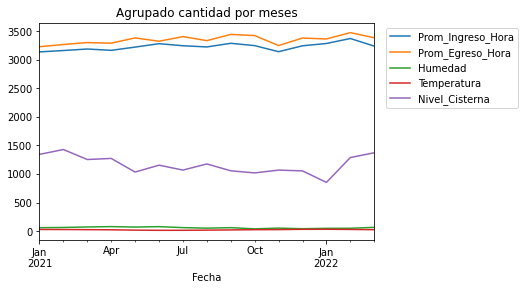

In [23]:
#sbn.barplot(x='periodo', y='Nivel_Cisterna', data=train_df, palette='Blues_d');
# get the keys of the groupby

#plt.figure(figsize=(14,6))
#plt.bar(train_df.Fecha, train_df.Prom_Egreso_Hora, color='blue')
d.plot(kind='line', title="Agrupado cantidad por meses").legend(bbox_to_anchor= (1.02, 1));

In [ ]:



"""plt.plot(date_np, value_np)
plt.plot(dates.num2date(date_num_smooth), value_np_smooth)
plt.show()"""